## Project 6

In [1]:
import os
import subprocess
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
import scipy
import requests
from imdbpie import Imdb
import nltk
import matplotlib.pyplot as plt
import urllib
from bs4 import BeautifulSoup
import nltk
import collections
import re
import csv
import psycopg2

%matplotlib inline

### Pre-Work: Write a problem statement 

 Using the data from the Top 25 movies on IMDB, can we predict the attributes of what makes a successful movie?    

## Part 1: Acquire the Data

#### 1. Connect to the IMDB API

In [2]:
imdb = Imdb()
imdb = Imdb(anonymize=True)

#### 2. Query the top 250 rated movies in the database

In [3]:
top250 = imdb.top_250()

#### 3. Only select the top 25 movies and delete the uncessary rows

In [4]:
top25 = top250[:25]

#### 4. Write the Results to a csv

In [6]:
toCSV = top25
keys = toCSV[0].keys()
with open('top25.csv', 'wb') as output_file:
    dict_writer = csv.DictWriter(output_file, keys)
    dict_writer.writeheader()
    dict_writer.writerows(toCSV)

## Part 2: Wrangle the text data

#### 1. Convert the listing identification numbers (tconst) from the first dataframe to a list

In [7]:
df_top_25 = pd.read_csv('top25.csv')
tconst = df_top_25['tconst']

#### 2. Scrape the reviews for the top 25 movies

*Hint*: Use a loop to scrape each page at once

Already done with above code.

#### 3. Work through each title and find the most common descriptors

*Hint*: "soup" from BeautifulSoup is the html returned from all 25 pages. You'll need to either address each page individually or break them down by elements

Already done with above code.

#### 4. Convert to a string and remove the non AlphaNumeric characters

*Hint*: Use regular expressions!

Data is already given in assets folder.

#### 5. Tokenize the Output

Data is already given in assets folder.

#### 6. Convert to a Dataframe for Easy Viewing

Data is already given in assets folder.

####  7. Find the rows with the top five descriptive words

In [8]:
words = ('best', 'hope', 'love', 'beautiful', 'great')

#### 8. Write the results to a csv

Data is already given in assets folder.

#### 9. Repeat the process for the other top 24 titles

## Part 3: Combine Tables in PostgreSQL

#### 1. Import your two .csv data files into your Postgre Database as two different tables

For ease, we can call these table1 and table2

#### 2. Connect to database and query the joined set

In [8]:
# psql create database imdb_db encoding 'utf-8';
# params = {
#   'dbname': 'imdb_db',
#   'user': 'roshanakomrani',
#   'password': 'test1234',
#   'host': 'localhost',
#   'port': 5432
# }

# conn = psycopg2.connect(**params)

from sqlalchemy import create_engine 
import getpass
p = getpass.getpass()

········


In [9]:
engine = create_engine('postgresql://Lappy9000:%s@localhost:5432/imdb_db' %p)

In [10]:
df_sentiment = pd.read_csv('/Users/Lappy9000/Dropbox/Dropbox/GA/GitHub/DSI_SM_01/projects/01-projects-weekly/project-06/assets/data/sentiment table.csv') #encoding='utf-8'
df_sentiment.to_sql('sentiment', con=engine, if_exists = 'replace')
df_top_25.to_sql('top_25', con=engine, if_exists='replace')

In [11]:
print df_sentiment.index
print df_top_25.index

RangeIndex(start=0, stop=26, step=1)
RangeIndex(start=0, stop=25, step=1)


#### 3. Join the two tables 

In [12]:
df1 = pd.read_sql_query("SELECT * FROM sentiment AS s INNER JOIN top_25 AS t25 ON s.index = t25.index;", con=engine)
#con.commit()
df1.head()

,index,title,excellent,great,love,beautiful,best,hope,groundbreaking,amazing,index,rating,tconst,title,image,num_votes,year,can_rate,type
0,0,The Shawshank Redemption,0,1.0,0,NaN,0.0,0,0,1,0,9.3,tt0111161,The Shawshank Redemption,{u'url': u'http://ia.media-imdb.com/images/M/M...,1678520,1994,True,feature
1,1,The Godfather,1,1.0,0,0.0,1.0,0,1,0,1,9.2,tt0068646,The Godfather,{u'url': u'http://ia.media-imdb.com/images/M/M...,1148435,1972,True,feature
2,2,The Godfather: Part II,1,1.0,0,0.0,1.0,0,0,1,2,9.0,tt0071562,The Godfather: Part II,{u'url': u'http://ia.media-imdb.com/images/M/M...,785332,1974,True,feature
3,3,The Dark Knight,1,1.0,1,0.0,1.0,0,1,1,3,9.0,tt0468569,The Dark Knight,{u'url': u'http://ia.media-imdb.com/images/M/M...,1663710,2008,True,feature
4,4,Schindler's List,1,1.0,1,1.0,1.0,1,1,1,4,8.9,tt0108052,Schindler's List,{u'url': u'http://ia.media-imdb.com/images/M/M...,859037,1993,True,feature


#### 4. Select the newly joined table and save two copies of the into dataframes

In [13]:
df2 = df1.copy()

## Part 4: Parsing and Exploratory Data Analysis

#### 1. Rename the column headings

Columns do not need to be renamed

#### 2. Run a description of the data

In [14]:
print df1.describe

<bound method DataFrame.describe of     index                                              title  excellent  \
0       0                          The Shawshank Redemption           0   
1       1                                      The Godfather          1   
2       2                            The Godfather: Part II           1   
3       3                                   The Dark Knight           1   
4       4                                   Schindler's List          1   
5       5                                       12 Angry Men          1   
6       6                                       Pulp Fiction          0   
7       7    The Lord of the Rings: The Return of the King            1   
8       8                    The Good, the Bad and the Ugly           0   
9       9                                         Fight Club          0   
10     10  The Lord of the Rings: The Fellowship of the R...          1   
11     11    Star Wars: Episode V - The Empire Strikes Back     

In [15]:
print df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 19 columns):
index             25 non-null int64
title             25 non-null object
excellent         25 non-null int64
great             24 non-null float64
love              25 non-null int64
beautiful         24 non-null float64
best              24 non-null float64
hope              25 non-null int64
groundbreaking    25 non-null int64
amazing           25 non-null int64
index             25 non-null int64
rating            25 non-null float64
tconst            25 non-null object
title             25 non-null object
image             25 non-null object
num_votes         25 non-null int64
year              25 non-null int64
can_rate          25 non-null bool
type              25 non-null object
dtypes: bool(1), float64(4), int64(9), object(5)
memory usage: 3.6+ KB
None


In [16]:
df1.fillna(value=0,inplace = 'True')
df1.head()

,index,title,excellent,great,love,beautiful,best,hope,groundbreaking,amazing,index,rating,tconst,title,image,num_votes,year,can_rate,type
0,0,The Shawshank Redemption,0,1.0,0,0.0,0.0,0,0,1,0,9.3,tt0111161,The Shawshank Redemption,{u'url': u'http://ia.media-imdb.com/images/M/M...,1678520,1994,True,feature
1,1,The Godfather,1,1.0,0,0.0,1.0,0,1,0,1,9.2,tt0068646,The Godfather,{u'url': u'http://ia.media-imdb.com/images/M/M...,1148435,1972,True,feature
2,2,The Godfather: Part II,1,1.0,0,0.0,1.0,0,0,1,2,9.0,tt0071562,The Godfather: Part II,{u'url': u'http://ia.media-imdb.com/images/M/M...,785332,1974,True,feature
3,3,The Dark Knight,1,1.0,1,0.0,1.0,0,1,1,3,9.0,tt0468569,The Dark Knight,{u'url': u'http://ia.media-imdb.com/images/M/M...,1663710,2008,True,feature
4,4,Schindler's List,1,1.0,1,1.0,1.0,1,1,1,4,8.9,tt0108052,Schindler's List,{u'url': u'http://ia.media-imdb.com/images/M/M...,859037,1993,True,feature


#### 3. Visualize the Data

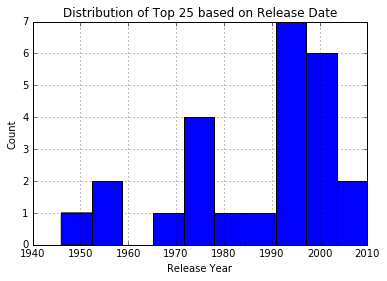

In [17]:
df1['year'].hist()
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.title('Distribution of Top 25 based on Release Date')

Most movies in the top 25 list are released after 1990.

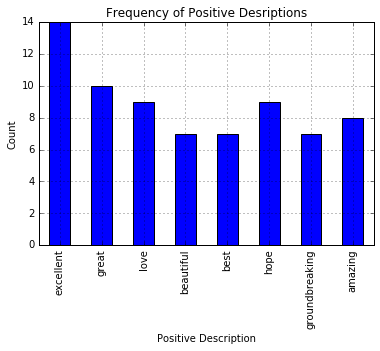

In [18]:
desc_count = df1.iloc[:,2:10].sum()
desc_count.plot(kind = 'bar')
plt.grid()
plt.xlabel('Positive Description')
plt.ylabel('Count')
plt.title('Frequency of Positive Desriptions')

"Excellent" is used most often by the reviewers to describe the Top 25.

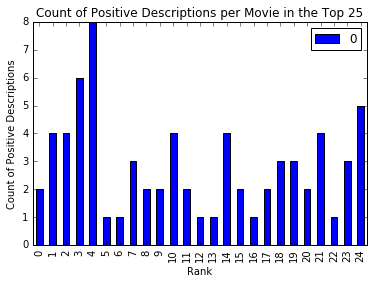

In [19]:
movie_desc_count = pd.DataFrame(df1.iloc[:,2:10].sum(axis = 1))
movie_desc_count.plot(kind = 'bar')
plt.xlabel('Rank')
plt.ylabel('Count of Positive Descriptions')
plt.title('Count of Positive Descriptions per Movie in the Top 25')

Apparently, the features selected here do not best correlated with a movie ranking. The fifth movie in the record has been described by 8 of these positive features, while the first movie only receives two positive features. The feature selection neglects the frequency of each positive attribute in the reviews. It is possible that the two features which desribe the first record have appeared in its reviews more frequently than the eight features that describe the fifth record. 
Next, we look at the number of votes per movie. This feature may somehow alleviate the effects of the above-mentioned pitfall in the selection of model features.

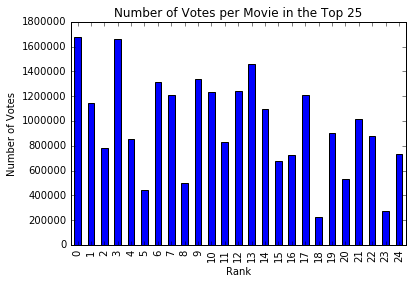

In [20]:
df1['num_votes'].plot(kind = 'bar')
plt.xlabel('Rank')
plt.ylabel('Number of Votes')
plt.title('Number of Votes per Movie in the Top 25')

## Part 3: Build the Decision Tree

#### 1. What is our target attribute? 

We chose rating as our target variable as it seems to be the most interesting.  We wanted to use both attributes and votes in our model, and accomplished this using a pd.concat method.

In [21]:
y = df1['rating']
col = df1.columns
X1 = df1[col[2:10]]
X2 = df1[col[15]]
X = pd.concat([X1,X2],axis=1)
X.head()

,excellent,great,love,beautiful,best,hope,groundbreaking,amazing,num_votes
0,0,1.0,0,0.0,0.0,0,0,1,1678520
1,1,1.0,0,0.0,1.0,0,1,0,1148435
2,1,1.0,0,0.0,1.0,0,0,1,785332
3,1,1.0,1,0.0,1.0,0,1,1,1663710
4,1,1.0,1,1.0,1.0,1,1,1,859037


#### 2. Prepare the data and define the training set

The data set is very small and excluding a subset as the train test will result in even smaller number of training points. Therefore, instead of a train-test split, we will use k-fold cross validation. 

In [22]:
from sklearn.tree import DecisionTreeRegressor,  export_graphviz
from sklearn.cross_validation import KFold, cross_val_score,cross_val_predict
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydot

cv = KFold(len(y), shuffle=True , n_folds=5, random_state =42)

# Useful functions
# Function to create images of tree models using pydot
def print_tree(estimator, features, class_names=None, filled=True):
    tree = estimator
    names = features
    color = filled
    classn = class_names
    
    dot_data = StringIO()
    export_graphviz(estimator, out_file=dot_data, feature_names=features, class_names=classn, filled=filled)
    graph = pydot.graph_from_dot_data(dot_data.getvalue())
    return(graph)

# Function to plot feature importances
def print_features(model,X,y,features):
    features = pd.Series(features)
    model.fit(X, y)
#     importances = model.feature_importances_
    try:
        importances = np.mean([tree.feature_importances_ for tree in model.estimators_],axis=0)
        std = np.std([tree.feature_importances_ for tree in model.estimators_],axis=0)
    except:
        importances = model.feature_importances_
        std = 0
        
    indices = np.argsort(importances)[::-1]
    print indices

    # Print the feature ranking
    print("Feature ranking:")

    for f in range(indices.size):#(X.shape[1]):
        print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

    # Plot the feature importances of the forest
    plt.figure()
    plt.title("Feature importances")
    try:
        plt.bar(range(indices.size), importances[indices],
               color="r", yerr=std[indices], align="center")
    except:
        plt.bar(range(indices.size), importances[indices],
           color="r", yerr=std, align="center")
    plt.xticks(range(indices.size), features[indices], rotation=90)
    plt.xlim([-1, X.shape[1]])
    plt.show()

# Function to plot true-predict target pairs
def true_pred_plot(model,X,y,cv):
    for fold, color in zip(cv, ['r', 'g', 'b','k','c']):
        X_train = X.iloc[fold[0]]
        X_test  = X.iloc[fold[1]]
        y_train = y.iloc[fold[0]]
        y_test  = y.iloc[fold[1]]
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        plt.scatter(y_test, y_pred, color=color)
        plt.xlabel('Actual')
        plt.ylabel('Prediction')
        plt.grid()
        plt.axis('equal')
        plt.plot([0,10],[0,10])
#         plt.plot([8.5,9.5],[8.5,9.5])
#         plt.text(9,9.5, "R2: "+str(m), fontsize=20, )
    
    

#### 2. Train the Model

cross_val_score:
-3.38930633897
MSE:
0.0552
Variance:
0.0125760190192


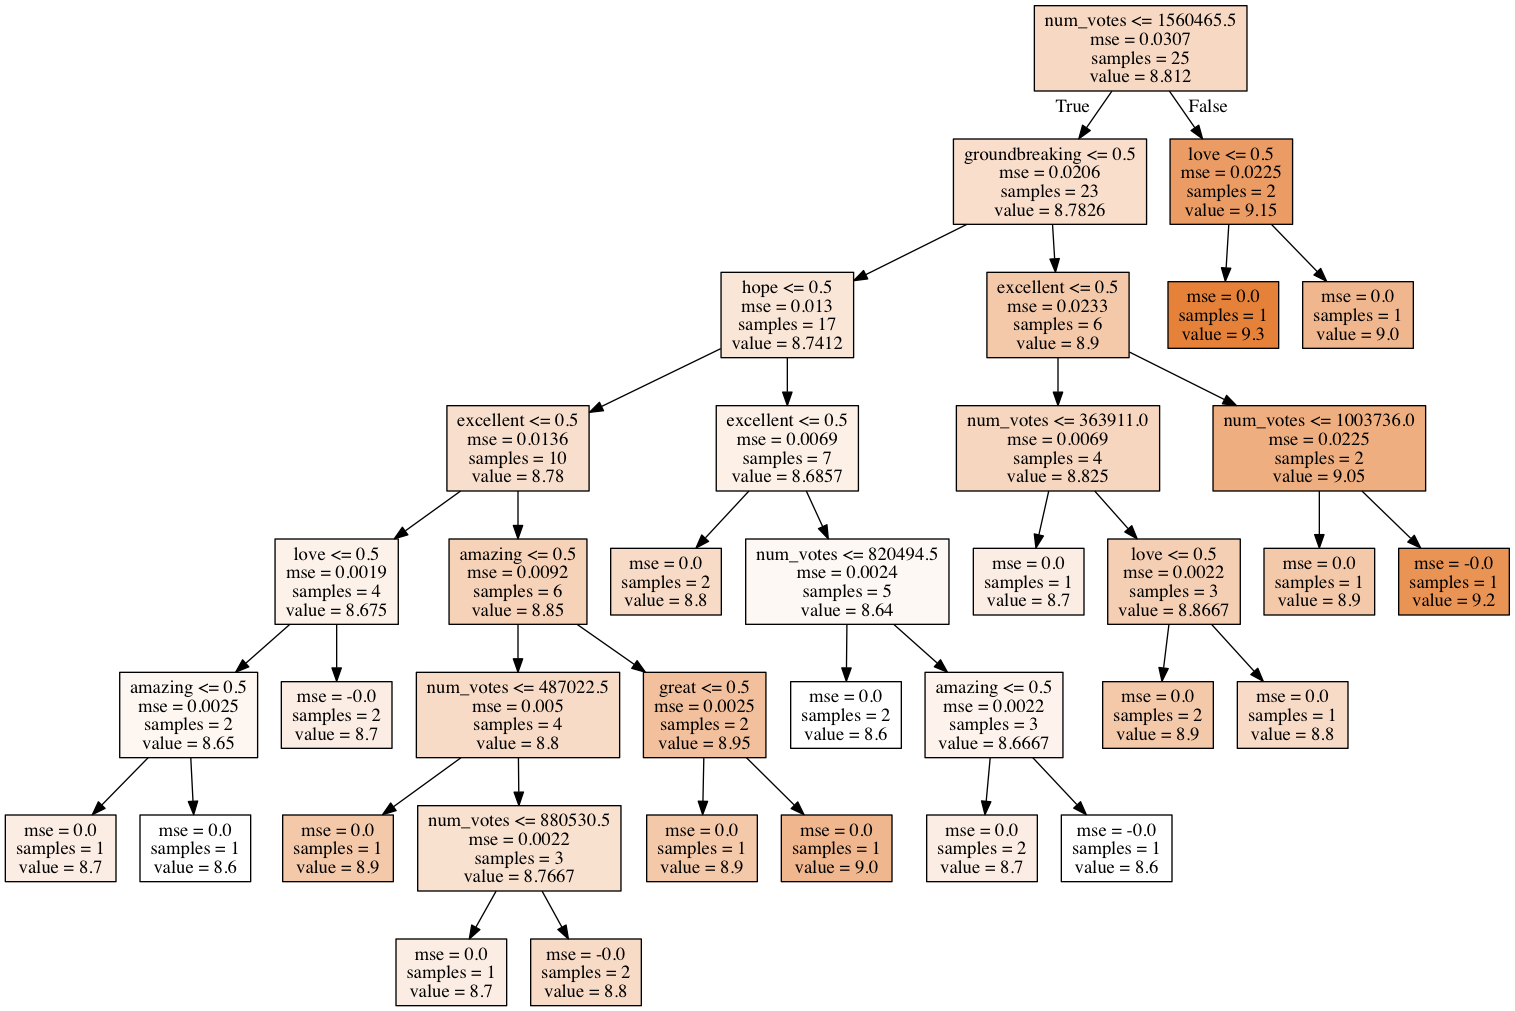

In [23]:
# Estimate a decision tree regressor
features=['excellent','great','love','beautiful','best','hope','groundbreaking','amazing','num_votes']
dt_init = DecisionTreeRegressor(random_state = 42)
dt_init.fit(X,y)
y_predict = cross_val_predict(dt_init,X,y,cv=cv)
score = cross_val_score(dt_init,X,y,cv=cv)
print "cross_val_score:"
print score.mean()        
print "MSE:"
print mean_squared_error(y,y_predict)
print "Variance:"
print (mean_squared_error(y,y_predict))/(1-score.mean())
graph = print_tree(dt_init, features)
Image(graph.create_png())

Cross-validation returns a small MSE, which indicates that the model is fitting training data very closely. However, the above decision tree chart is a good representation of how our model is over-fitted.  This seems to be a result of a small data set and the fact that the feature set is limited by nature.  For one all of the reviews are positive, and the attributes assigned to them are arbitrary and small in scope. We tried to counter this by utilizing user votes in our model but it has not had a large impact. 
Per scikit learn documentation, "The coefficient R^2 is defined as (1 - u/v), where u is the regression sum of squares ((y_true - y_pred) ** 2).sum() and v is the residual sum of squares ((y_true - y_true.mean()) ** 2).sum(). Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse)." 
We can calculate the variance (v) by substituting for R2-score and MSE in the above formulation. This yields a small variance of 0.01, which confirms that the model is overfitted to the training data. 

Next, we employ a number of alternatives to improve the performance of our regressor.

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=42,
           splitter='best')
cross_val_score:
-2.42706253638
MSE:
0.0380562659412
Variance:
0.0111046313095


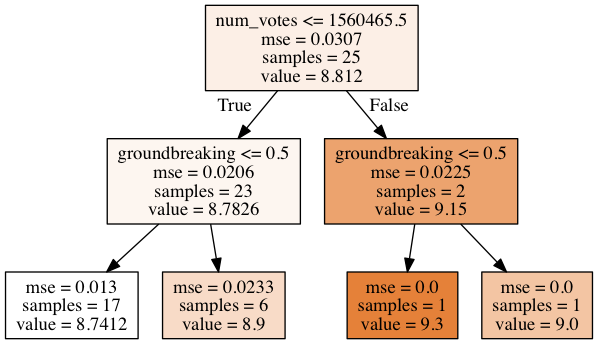

In [24]:
# Grid search over various tree depths
dt_init = DecisionTreeRegressor(random_state = 42)
gs1 = GridSearchCV(dt_init,{'max_depth':range(2,9)},cv=cv)
gs1.fit(X,y)
y_predict = cross_val_predict(gs1.best_estimator_,X,y,cv=cv)
score = cross_val_score(gs1.best_estimator_,X,y,cv=cv)
print gs1.best_estimator_
print "cross_val_score:"
print score.mean()        
print "MSE:"
print mean_squared_error(y,y_predict)
print "Variance:"
print (mean_squared_error(y,y_predict))/(1-score.mean())
graph = print_tree(gs1.best_estimator_, features=['excellent','great','love','beautiful','best','hope','groundbreaking','amazing','num_votes'])
Image(graph.create_png())

Search for the best depth slighlty improves the r2-score. 

[8 6 7 5 4 3 2 1 0]
Feature ranking:
1. feature 8 (0.612888)
2. feature 6 (0.387112)
3. feature 7 (0.000000)
4. feature 5 (0.000000)
5. feature 4 (0.000000)
6. feature 3 (0.000000)
7. feature 2 (0.000000)
8. feature 1 (0.000000)
9. feature 0 (0.000000)


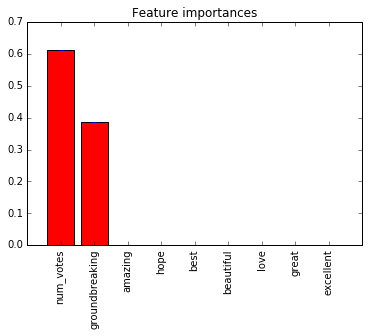

In [25]:
print_features(gs1.best_estimator_,X,y,features)

[8, 10, 8, 10]

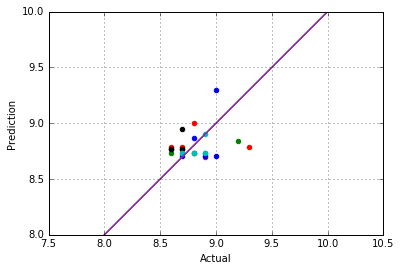

In [26]:
true_pred_plot(gs1.best_estimator_,X,y,cv)
plt.axis([8,10, 8, 10])

In [27]:
# Bagging Regressor
bg = BaggingRegressor(DecisionTreeRegressor(random_state =42),random_state =42)
param_bg = {
    'n_estimators':[50,100,250,500],
    'max_samples':[0.25, 0.5, 0.75, 1.0],
    'max_features':[0.25, 0.5, 0.75, 1.0]
}
gsbg = GridSearchCV(bg,param_bg, cv=cv)
gsbg.fit(X,y)
y_predict = cross_val_predict(gsbg.best_estimator_,X,y,cv=cv)
score = cross_val_score(gsbg.best_estimator_,X,y,cv=cv)
print gsbg.best_estimator_
print "cross_val_score:"
print score.mean()        
print "MSE:"
print mean_squared_error(y,y_predict)
print "Variance:"
print (mean_squared_error(y,y_predict))/(1-score.mean())

BaggingRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=42,
           splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=0.75,
         max_samples=1.0, n_estimators=50, n_jobs=1, oob_score=False,
         random_state=42, verbose=0, warm_start=False)
cross_val_score:
-1.65891327211
MSE:
0.0297093055111
Variance:
0.0111734767067


A grid search over various combinations of bagging parameters returned use of all features, with 75% of the samples and 50 trees. However, variance is still very small and the r2-score does not improve.

[2 0 1 4 3 5]
Feature ranking:
1. feature 2 (0.219238)
2. feature 0 (0.186974)
3. feature 1 (0.184915)
4. feature 4 (0.165624)
5. feature 3 (0.134997)
6. feature 5 (0.108253)


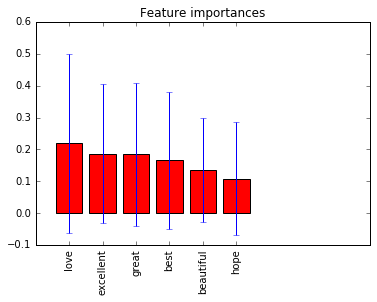

In [28]:
print_features(gsbg.best_estimator_,X,y,features)

[8, 10, 8, 10]

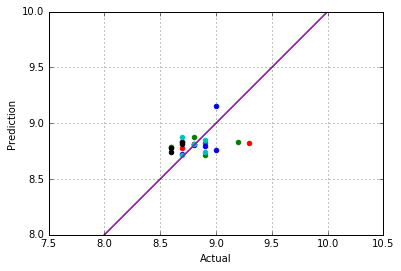

In [29]:
true_pred_plot(gsbg.best_estimator_,X,y,cv)
plt.axis([8,10, 8, 10])

In [30]:
# # Random Forest Regressor
rf = RandomForestRegressor(random_state =42)
param_rf = {'n_estimators':[50,100,250,500],
            'max_depth':range(2,9)}
gsrf = GridSearchCV(rf,param_rf, cv=cv)
gsrf.fit(X,y)
y_predict = cross_val_predict(gsrf.best_estimator_,X,y,cv=cv)
score = cross_val_score(gsrf.best_estimator_,X,y,cv=cv)
print gsrf.best_estimator_
print "cross_val_score:"
print score.mean()        
print "MSE:"
print mean_squared_error(y,y_predict)
print "Variance:"
print (mean_squared_error(y,y_predict))/(1-score.mean())

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=42,
           verbose=0, warm_start=False)
cross_val_score:
-2.04564912476
MSE:
0.0326867704713
Variance:
0.0107322837045


A grid search over various combinations of randomforest parameters returned maximum depth of 7 and 50 trees. Again, variance is very small and the r2-score does not improve. 

[8 6 4 7 5 1 2 3 0]
Feature ranking:
1. feature 8 (0.534252)
2. feature 6 (0.142035)
3. feature 4 (0.070970)
4. feature 7 (0.059474)
5. feature 5 (0.054767)
6. feature 1 (0.043758)
7. feature 2 (0.036378)
8. feature 3 (0.031205)
9. feature 0 (0.027161)


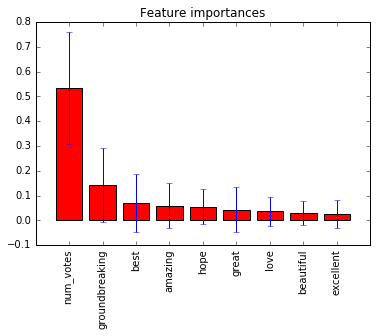

In [31]:
print_features(gsrf.best_estimator_,X,y,features)

[8, 10, 8, 10]

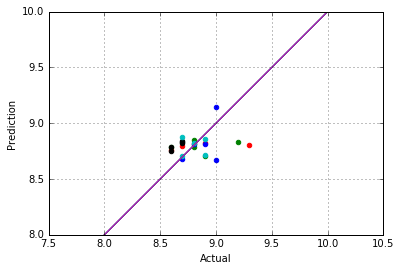

In [32]:
true_pred_plot(gsrf.best_estimator_,X,y,cv)
plt.axis([8,10, 8, 10])

In [33]:
# Adaboost Regressor
ab = AdaBoostRegressor(random_state =42)
param_ab = {'n_estimators':[50,100,250,500]}
gsab = GridSearchCV(ab,param_ab, cv=cv)
gsab.fit(X,y)
y_predict = cross_val_predict(gsab.best_estimator_,X,y,cv=cv)
score = cross_val_score(gsab.best_estimator_,X,y,cv=cv)
print gsrf.best_estimator_
print "cross_val_score:"
print score.mean()        
print "MSE:"
print mean_squared_error(y,y_predict)
print "Variance:"
print (mean_squared_error(y,y_predict))/(1-score.mean())


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=42,
           verbose=0, warm_start=False)
cross_val_score:
-2.29929774355
MSE:
0.0350152998866
Variance:
0.0106129554252


Adaboost has no better luck than bagging and randomforest. Apparently, various techniques for strengthening the performance of the decision tree regressor are not effective as long as we do not improve the feature space. 

[8 5 6 1 4 0 7 2 3]
Feature ranking:
1. feature 8 (0.471265)
2. feature 5 (0.101802)
3. feature 6 (0.100202)
4. feature 1 (0.100048)
5. feature 4 (0.091732)
6. feature 0 (0.043740)
7. feature 7 (0.035440)
8. feature 2 (0.028004)
9. feature 3 (0.027768)


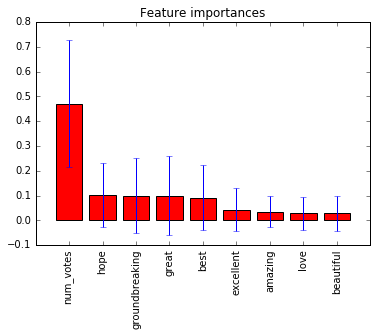

In [34]:
print_features(gsab.best_estimator_,X,y,features)

Except for bagging, the rest of the methods return nubmer of votes as the most important feature.

[8, 10, 8, 10]

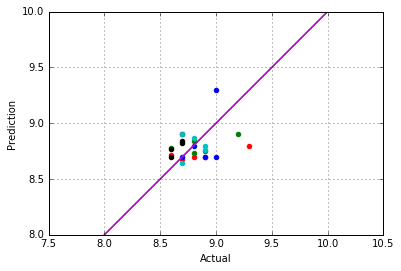

In [35]:
true_pred_plot(gsab.best_estimator_,X,y,cv)
plt.axis([8,10, 8, 10])

For all models, as a result of overfitting and poor performance with the test data, the actual-prediction pairs corresponding to the 5 test folds are scattered and do not align well with teh 1:1 line.

#### 3. Set up test data and test the model

Addressed above

#### 5. Check the results

Addressed above

#### 6. What is overfitting and how are we at risk? 

This excercise had us dealing with a very overfitted model - this is represented by the small data set itself, and the fact that the feature set is limited by nature.  For one all of the reviews are positive, and the attributes assigned to them are arbitrary and small in scope.  We tried to counter this by utilizing user votes in our model but it did not had a large impact.

Our first attempt at a a successful model returned an R2-score of .01, and as explemiflied in the decision tree, was clearly overfitted.  We attempted to resolve this through the implementation of numerous alternative models.

Grid search over various combinations of bagging parameters returned the use of all features, with 75% of the samples and 50 trees, however, the variance was still very small and the r2-score did not improve.

Grid Search over various combinations of randomforest parameters returned a maximum depth of 7 and 50 trees. However, the variance was once again very small and the r2-score still did not improve. 

Adaboost had no better luck than bagging and randomforest. These tests proved to us that our attempts would not be successful unless we were to improve the feature space.

In addition, except for bagging, the methods returned nubmer of votes as the most important feature.

The data seems to imply that we could, in fact, build a reliable predictive model, but in order to do so we would need a larger and more robust data set.

The material presented in this notebook is the outcome of a collaborative effort.
We worked together over data cleaning and EDA. 

Chris: 
- Reviewed the lecture examples and outlined the type of estimators (Decision tree, bagging, randomforest, adaboost) and the scatter plot to be used. 
- Used the conclusions within the notebook and arranged them into a summary report.

Roshanak: 
- Added grid search and tuning parameters to each module as well as the feature importance plots.
- Provided comments and conclusions after each analysis within the notebook.